In [78]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

In [79]:
dataframe = pd.read_csv(r"indicadores_H5W1_sentencebert_CLASS2.csv")
dataframe

,Who,Where,When,What,Why,How,Additional information,CLASS
0,0.696783,0.076060,1.0,0.505262,1.0,1.0,1.000000,entailment
1,0.762582,1.000000,1.0,0.944161,1.0,1.0,0.699488,entailment
2,0.881357,0.265408,1.0,0.360803,1.0,1.0,1.000000,contradiction
3,0.153366,1.000000,1.0,0.358316,1.0,1.0,1.000000,contradiction
4,0.919903,0.715984,1.0,0.224679,1.0,1.0,1.000000,neutral
...,...,...,...,...,...,...,...,...
95,0.706643,0.210286,1.0,0.570392,1.0,1.0,1.000000,entailment
96,0.894956,1.000000,1.0,0.830284,1.0,1.0,1.000000,entailment
97,0.072305,1.000000,1.0,0.086890,1.0,1.0,1.000000,contradiction
98,0.655674,1.000000,1.0,0.357685,1.0,1.0,1.000000,contradiction


In [80]:
dataframe.describe()

,Who,Where,When,What,Why,How,Additional information
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.712144,0.751508,0.923311,0.496864,0.908617,0.860216,0.870180
std,0.254961,0.338036,0.233606,0.327958,0.259196,0.309860,0.293922
min,0.072305,0.076060,0.187566,-0.011613,-0.009505,0.026425,-0.013459
25%,0.532159,0.360418,1.000000,0.216580,1.000000,1.000000,1.000000
50%,0.751170,1.000000,1.000000,0.456016,1.000000,1.000000,1.000000
75%,0.986195,1.000000,1.000000,0.807519,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
print(dataframe.groupby('CLASS').size())

CLASS
contradiction    27
entailment       42
neutral          31
dtype: int64


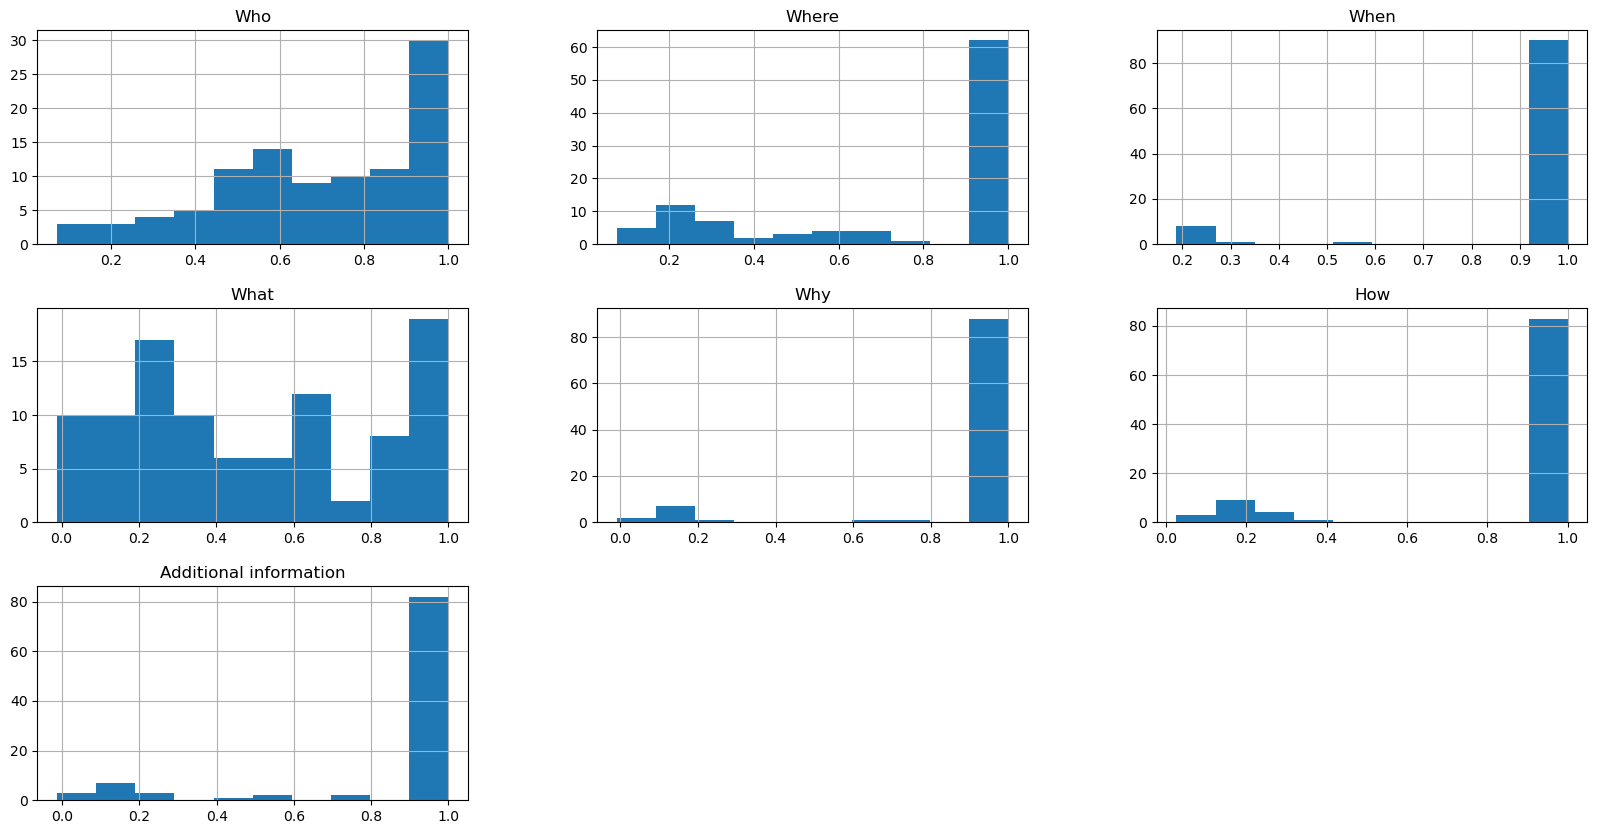

In [82]:
dataframe.hist(figsize=(20,10))
plt.show()

c:\Users\Ninja\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


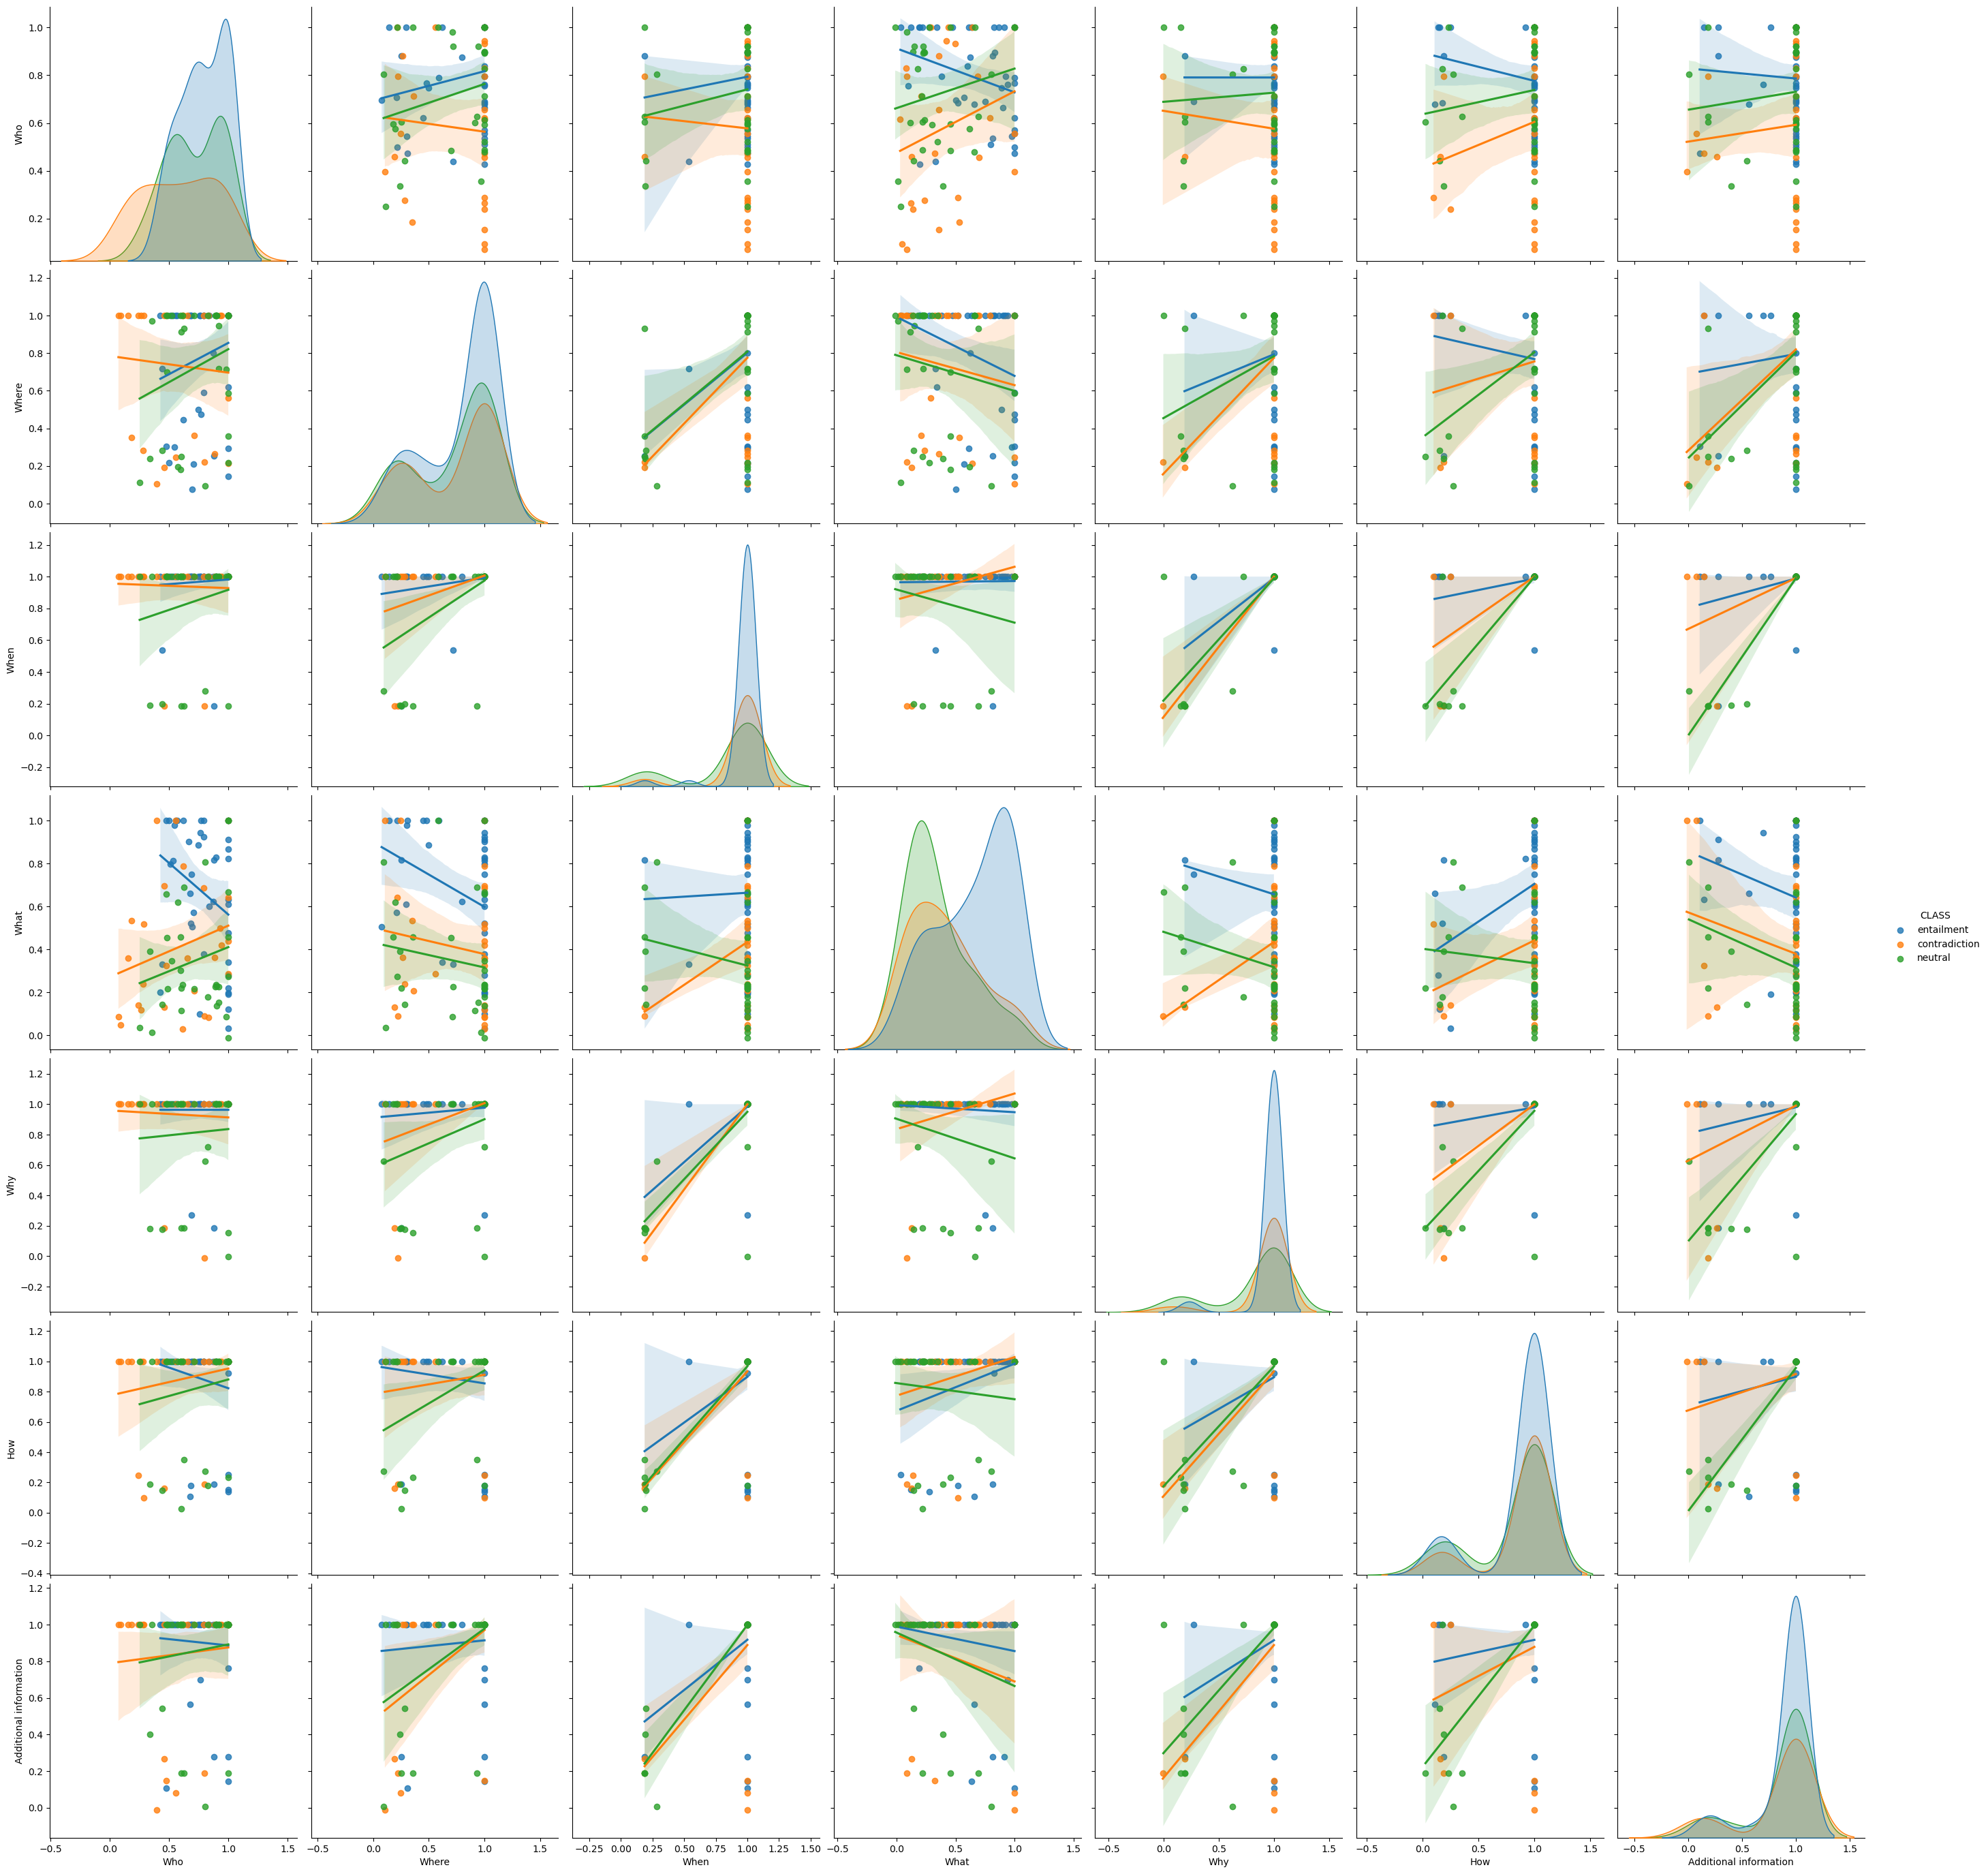

In [83]:
sb.pairplot(dataframe.dropna(), hue='CLASS',size=4,vars=['Who','Where','When','What','Why','How','Additional information'],kind='reg')

In [84]:
X = np.array(dataframe.drop(['CLASS'],1))
X_test = np.array(dataframe.drop(['CLASS'],1))
y = np.array(dataframe['CLASS'])
y_test =np.array(dataframe['CLASS'])
X.shape

C:\Users\Ninja\AppData\Local\Temp\ipykernel_15884\1802400925.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(dataframe.drop(['CLASS'],1))
C:\Users\Ninja\AppData\Local\Temp\ipykernel_15884\1802400925.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = np.array(dataframe.drop(['CLASS'],1))


(100, 7)

In [85]:
y_test

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [86]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [87]:
model = linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X,y)

LogisticRegression(C=0.1)

In [88]:
model.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [89]:
model.decision_function(X)

array([[-1.53966091e-01,  2.14716718e-01, -6.07506264e-02],
       [-2.58694702e-01,  5.09509984e-01, -2.50815281e-01],
       [-1.90348973e-01,  2.05458715e-01, -1.51097420e-02],
       [-8.80424299e-03,  8.93176138e-02, -8.05133708e-02],
       [-1.96260107e-01,  1.87516692e-01,  8.74341438e-03],
       [-7.86072502e-03, -3.56806697e-02,  4.35413947e-02],
       [-2.44844653e-01,  1.03601481e-01,  1.41243172e-01],
       [-2.78665693e-01,  2.71459162e-01,  7.20653110e-03],
       [-1.42707333e-01,  2.52105056e-01, -1.09397723e-01],
       [-2.26283287e-01,  3.12457079e-01, -8.61737924e-02],
       [-1.90808197e-01,  1.14997985e-01,  7.58102123e-02],
       [-1.14945170e-01,  2.13764046e-01, -9.88188759e-02],
       [-2.47858276e-01,  4.87883996e-01, -2.40025720e-01],
       [-3.09086277e-02,  1.18631645e-02,  1.90454632e-02],
       [-1.11630908e-01, -2.44118388e-01,  3.55749296e-01],
       [-1.93161726e-01,  1.72139064e-01,  2.10226621e-02],
       [-2.30295458e-01,  3.70128717e-01

In [90]:
labels=np.array(['Who','Where','When','What','Why','How','Additional information'])

In [91]:
model.classes_

array(['contradiction', 'entailment', 'neutral'], dtype=object)

In [92]:
contradiction=model.coef_[0]
entailment=model.coef_[1]
neutral=model.coef_[2]

In [93]:
print("Contradiction ",np.argmax(contradiction),labels[np.argmax(contradiction)],np.argmin(contradiction),labels[np.argmin(contradiction)])
print("Entailment ",np.argmax(entailment),labels[np.argmax(entailment)],np.argmin(entailment),labels[np.argmin(entailment)])
print("Neutral ",np.argmax(neutral),labels[np.argmax(neutral)],np.argmin(neutral),labels[np.argmin(neutral)])

Contradiction  4 Why 0 Who
Entailment  3 What 5 How
Neutral  0 Who 3 What


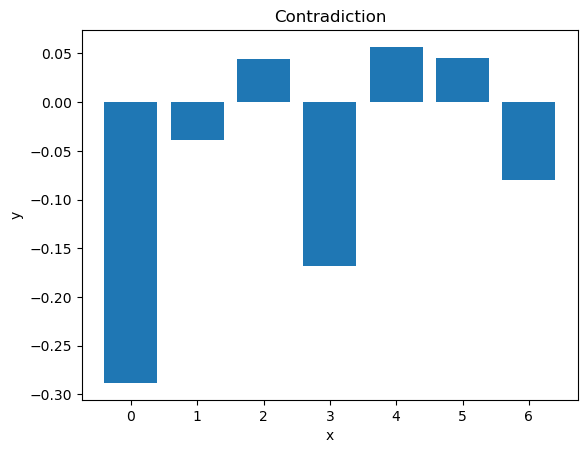

In [94]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,7,1)
y_v = contradiction

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contradiction')
plt.show()

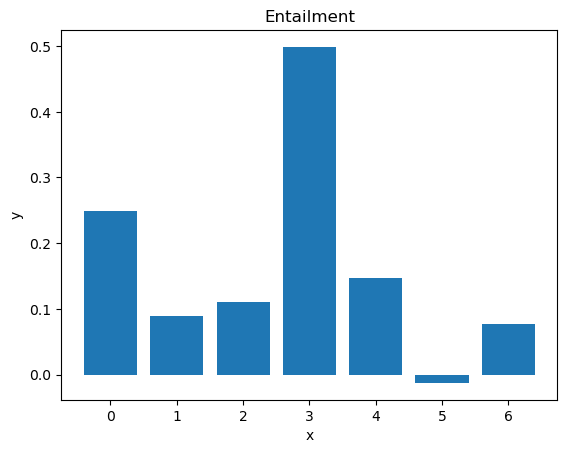

In [95]:
x_v = np.arange(0,7,1)
y_v = entailment

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Entailment')
plt.show()

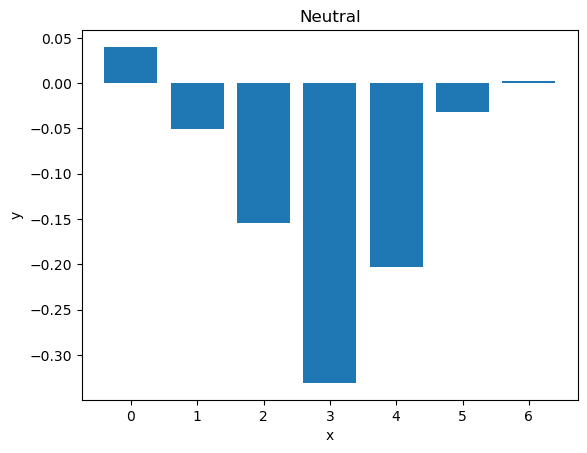

In [96]:
x_v = np.arange(0,7,1)
y_v = neutral

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neutral')
plt.show()

In [97]:
predictions = model.predict(X)
print(predictions)

['entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'neutral' 'neutral' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'neutral' 'neutral' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'neutral' 'entailment' 'entailment' 'neutral'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'neutral' 'entailment' 'neutral' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'neutral' 'entailment' 'contradiction' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailm

In [98]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [99]:
X

array([[ 0.69678307,  0.07605992,  1.        ,  0.50526154,  1.        ,
         1.        ,  1.        ],
       [ 0.76258183,  1.        ,  1.        ,  0.9441607 ,  1.        ,
         1.        ,  0.6994884 ],
       [ 0.88135707,  0.26540822,  1.        ,  0.36080334,  1.        ,
         1.        ,  1.        ],
       [ 0.15336624,  1.        ,  1.        ,  0.358316  ,  1.        ,
         1.        ,  1.        ],
       [ 0.91990316,  0.71598363,  1.        ,  0.22467884,  1.        ,
         1.        ,  1.        ],
       [ 0.35554165,  0.97049403,  1.        ,  0.01238701,  1.        ,
         1.        ,  1.        ],
       [ 0.62731695,  0.93157697,  0.18756612,  0.69085991,  0.18756612,
         0.35085416,  0.18756612],
       [ 1.        ,  1.00000012,  1.        ,  0.27992401,  1.        ,
         0.13744929,  1.        ],
       [ 0.57502532,  0.19680718,  1.00000012,  0.61912507,  1.00000012,
         1.00000012,  1.00000012],
       [ 0.6848194 ,  1.    

In [100]:
model.score(X,y)

0.52

In [101]:
validation_size = 0.10
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size)

In [102]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.411111 (0.122222)


In [103]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.5


In [104]:
print(confusion_matrix(Y_validation, predictions))

[[0 2 1]
 [0 4 0]
 [0 2 1]]


In [105]:
print(classification_report(Y_validation, predictions))

               precision    recall  f1-score   support

contradiction       0.00      0.00      0.00         3
   entailment       0.50      1.00      0.67         4
      neutral       0.50      0.33      0.40         3

     accuracy                           0.50        10
    macro avg       0.33      0.44      0.36        10
 weighted avg       0.35      0.50      0.39        10



c:\Users\Ninja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ninja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ninja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
